## Exercise 2 - Least Squares Method Linear Regression
Now that we have an understanding of the dataset we will try and construct a model for the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Reload the data from the previous exercise

In [2]:
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]
df_group_year = df.groupby('Year').agg(np.mean)

# Moving average
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();

Create a linear regression model using the default parameters i.e. calculate a y-intercept for the model and do not normalise the data

In [3]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now let's fit the model the input data is the year and the output value is the mean temperature for a given year.

In [4]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year.index.values.reshape((-1, 1)), df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [5]:
print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

m = 0.023146460838006862
c = -27.080386660799967

Model Definition
y = 0.02315x + -27.0804


What does the trendline provided by the model look like?  We can plot this simply using the first, middle and last years in the linear equation.

In [6]:
trend_x = np.array([
    df_group_year.index.values.min(),
    df_group_year.index.values.mean(),
    df_group_year.index.values.max()
])

trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

array([16.94418185, 18.19409074, 19.44399962])

Plot the values with the trendling

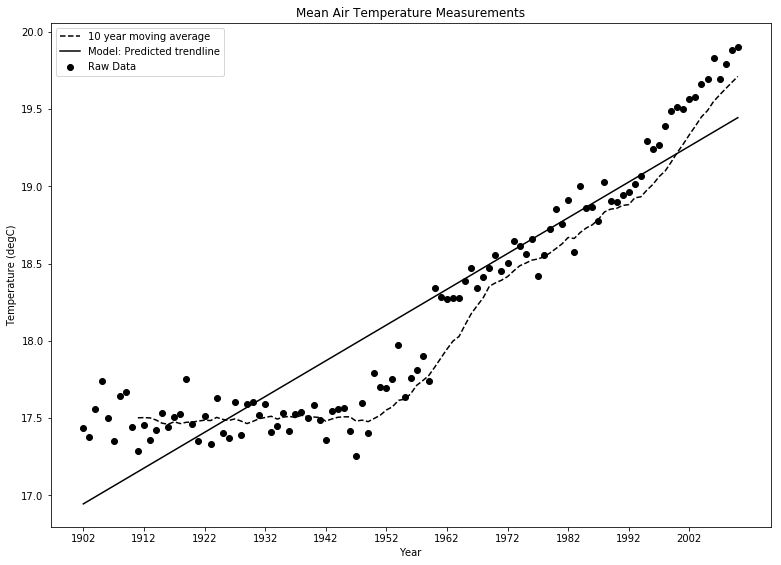

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

Evaluate the performance of the model

How well does the model fit the data?

In [8]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year.index.values.reshape((-1, 1)), df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.8618
